mnist - m

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

ds = load_dataset("Mike0307/MNIST-M")

import numpy as np

train_data = ds['train']
test_data = ds['test']

X_train_m = [np.array(image.resize((28, 28))) for image in train_data['image']]  # Resizing each image to (28, 28)
y_train_m = train_data['label']

X_test_m = [np.array(image.resize((28, 28))) for image in test_data['image']]  # Resizing each image to (28, 28)
y_test_m = test_data['label']

X_train_m = np.array(X_train_m)
X_test_m = np.array(X_test_m)
y_train_m = np.array(y_train_m)  
y_test_m = np.array(y_test_m)    

print('The current size of our dataset is : \nX_train -> ',X_train_m.shape,'\ny_train -> ' , y_train_m.shape, 
      '\nX_test -> ' , X_test_m.shape,'\ny_test' , y_test_m.shape )

c:\Users\anshb\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The current size of our dataset is : 
X_train ->  (59001, 28, 28, 3) 
y_train ->  (59001,) 
X_test ->  (9001, 28, 28, 3) 
y_test (9001,)


mnist

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


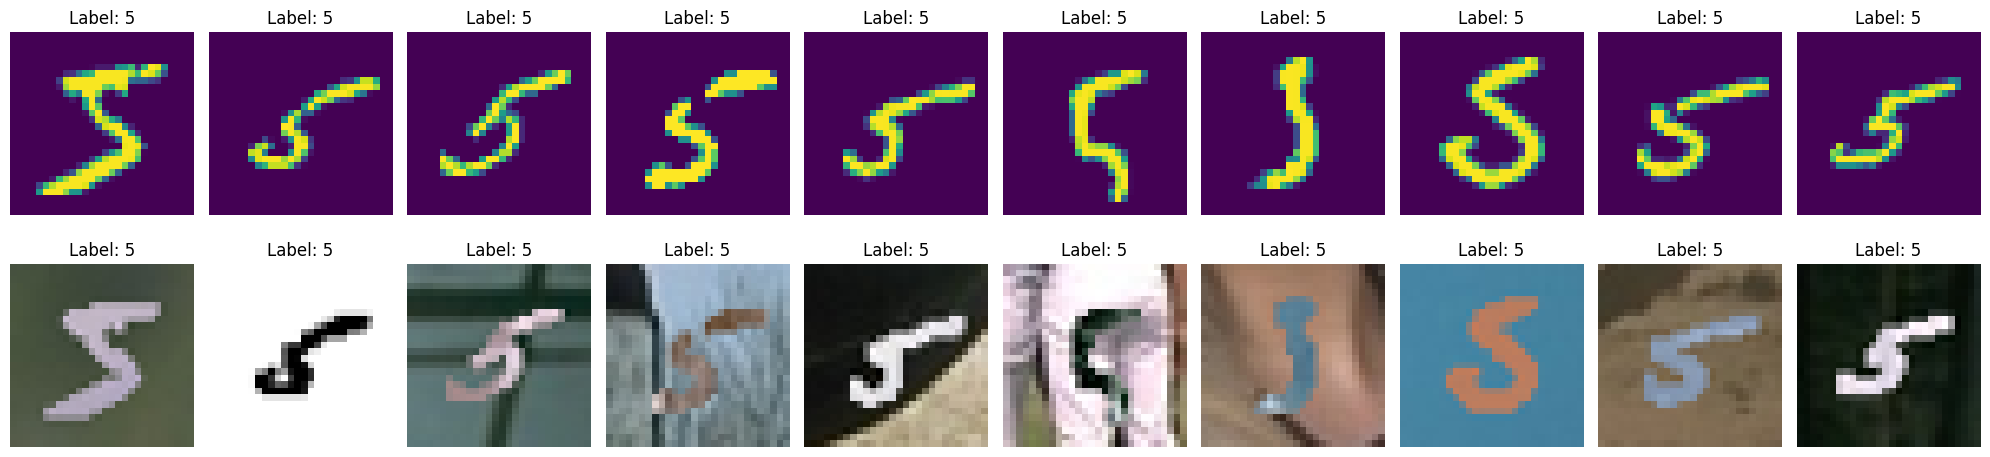

In [ ]:
def plot_images_by_label(ax, X, y, label, num_images=10):
    matching_indices = np.where(y == label)[0]
    num_images = min(num_images, len(matching_indices))
    
    for i in range(num_images):
        idx = matching_indices[i]
        ax[i].imshow(X[idx])
        ax[i].set_title(f'Label: {y[idx]}')
        ax[i].axis('off')

fig, axes = plt.subplots(2, 10, figsize=(20, 5))

plot_images_by_label(axes[0], X_train, y_train, label=5, num_images=10)

plot_images_by_label(axes[1], X_train_m, y_train_m, label=5, num_images=10)

plt.tight_layout()
plt.show()


MNIST

In [4]:
# Normalizing the image
'''
Converts pixel values from 0-255 (uint8) to 0.0-1.0 (float32).
This helps neural networks train faster and more accurately.
'''
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
print(len(X_train))

# expand the dimension to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

# we have converted our class to one hot vector 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

X_train = np.repeat(X_train, 3, axis=-1)  # from (N,28,28,1) to (N,28,28,3)
X_test = np.repeat(X_test, 3, axis=-1)


60000


MNIST-M

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

# Normalizing the image
'''
Converts pixel values from 0-255 (uint8) to 0.0-1.0 (float32).
This helps neural networks train faster and more accurately.
'''
X_train_m = X_train_m.astype(np.float32)/255
X_test_m = X_test_m.astype(np.float32)/255
print(len(X_train_m))

# we have converted our class to one hot vector 
y_train_m = keras.utils.to_categorical(y_train_m)
y_test_m = keras.utils.to_categorical(y_test_m)


59001


In [6]:
print("MNIST shape:", X_train.shape)        # Should be (num_samples, 28, 28, 1)
print("MNIST-M shape:", X_train_m.shape)    # Should be (num_samples, 28, 28, 3) or (num_samples, 28, 28, 1)


MNIST shape: (60000, 28, 28, 3)
MNIST-M shape: (59001, 28, 28, 3)


In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])


c:\Users\anshb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=4, verbose=1)
mc = ModelCheckpoint(r'bestmodel_domain_adaptation.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

In [14]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20, 
                    batch_size=64, 
                    callbacks=cb)

Epoch 1/20
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9949 - loss: 0.0153
Epoch 1: val_accuracy improved from -inf to 0.98910, saving model to bestmodel_domain_adaptation.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9949 - loss: 0.0153 - val_accuracy: 0.9891 - val_loss: 0.0346
Epoch 2/20
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9961 - loss: 0.0120
Epoch 2: val_accuracy improved from 0.98910 to 0.98990, saving model to bestmodel_domain_adaptation.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9899 - val_loss: 0.0375
Epoch 3/20
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9967 - loss: 0.0104
Epoch 3: val_accuracy improved from 0.98990 to 0.99170, saving model to bestmodel_domain_adaptation.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9967 - loss: 0.0104 - val_accuracy: 0.9917 - val_loss: 0.0291
Epoch 4/20
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9978 - loss: 0.0066
Epoch 4: val_accuracy did not improve from 0.99170
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9906 - val_loss: 0.0378
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9983 - loss: 0.0047
Epoch 5: val_accuracy did not improve from 0.99170
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9983 - loss: 0.0047 - val_accuracy: 0.9912 - val_loss: 0.0362
Epoch 6/20
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9983 - loss: 0.0047
Epoch 6: val_accuracy did not improve from 0.99170
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9983 - loss: 0.0047 - val_accuracy: 0.9877 - val_loss: 0.0501
Epoch 7/20
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9978 - loss: 0.0066
Epoch 7: val_accuracy d

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.9889 - loss: 0.0329
Test accuracy: 0.9889000058174133


In [12]:
test_loss, test_acc = model.evaluate(X_test_m, y_test_m, verbose=2)
print(f'Test accuracy: {test_acc}')

282/282 - 1s - 4ms/step - accuracy: 0.5639 - loss: 1.3563
Test accuracy: 0.5639373660087585


In [ ]:
# CORAL loss implementation
def coral_loss(source, target):
    source_shape = K.shape(source)
    batch_size = source_shape[0]
    
    # Reshape activations
    source_flat = K.reshape(source, (batch_size, -1))
    target_flat = K.reshape(target, (batch_size, -1))
    
    # Calculate covariance
    source_cov = (K.dot(K.transpose(source_flat), source_flat) / 
                 K.cast(batch_size - 1, K.floatx()))
    target_cov = (K.dot(K.transpose(target_flat), target_flat) / 
                 K.cast(batch_size - 1, K.floatx()))
    
    # Frobenius norm between covariance matrices
    loss = K.mean(K.square(source_cov - target_cov))
    return loss

In [ ]:
# MMD loss implementation
def gaussian_kernel(x, y, kernel_mul=2.0, kernel_num=5):
    total = K.concatenate([x, y], axis=0)
    total0 = K.expand_dims(total, 0)
    total1 = K.expand_dims(total, 1)
    L2_distance = K.sum(K.square(total0 - total1), axis=2)
    
    bandwidth = K.mean(L2_distance) / (kernel_mul ** (kernel_num // 2))
    bandwidth_list = [bandwidth * (kernel_mul**i) for i in range(kernel_num)]
    
    kernel_val = [K.exp(-L2_distance / bandwidth_temp) for bandwidth_temp in bandwidth_list]
    return kernel_val

def mmd_loss(source, target, kernel_mul=2.0, kernel_num=5):
    batch_size = K.shape(source)[0]
    kernels = gaussian_kernel(source, target, kernel_mul=kernel_mul, kernel_num=kernel_num)
    loss = 0
    for i in range(kernel_num):
        s_k = kernels[i]
        loss += K.mean(s_k[:batch_size, :batch_size])  # source vs source
        loss += K.mean(s_k[batch_size:, batch_size:])  # target vs target
        loss -= 2 * K.mean(s_k[:batch_size, batch_size:])  # source vs target
    loss = K.sqrt(loss)
    return loss